In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# SQUAD JSON TO PANDAS DATAFRAME FOR TRAIN SET

In [5]:
def squad_json_to_dataframe_train(input_file_path, record_path = ['data','paragraphs','qas','answers'],
                           verbose = 1):
    """
    input_file_path: path to the squad json file.
    record_path: path to deepest level in json file default value is
    ['data','paragraphs','qas','answers']
    verbose: 0 to suppress it default is 1
    """
    if verbose:
        print("Reading the json file")    
    file = json.loads(open(input_file_path).read())
    if verbose:
        print("Processing...")
    # parsing different level's in the json file
    js = pd.json_normalize(file , record_path )
    m = pd.json_normalize(file, record_path[:-1] )
    r = pd.json_normalize(file,record_path[:-2])
    
    #combining it into single dataframe
    idx = np.repeat(r['context'].values, r.qas.str.len())
    ndx  = np.repeat(m['id'].values,m['answers'].str.len())
    m['context'] = idx
    js['q_idx'] = ndx
    main = pd.concat([ m[['id','question','context']].set_index('id'),js.set_index('q_idx')],1,sort=False).reset_index()
    main['c_id'] = main['context'].factorize()[0]
    if verbose:
        print("shape of the dataframe is {}".format(main.shape))
        print("Done")
    return main

In [6]:
# SQUAD JSON TO PANDAS DATAFRAME FOR TEST SET AS SOME QUESTIONS HAVE MULTIPLE ANSWERS

In [7]:
def squad_json_to_dataframe_dev(input_file_path, record_path = ['data','paragraphs','qas','answers'],
                           verbose = 1):
    """
    input_file_path: path to the squad json file.
    record_path: path to deepest level in json file default value is
    ['data','paragraphs','qas','answers']
    verbose: 0 to suppress it default is 1
    """
    if verbose:
        print("Reading the json file")    
    file = json.loads(open(input_file_path).read())
    if verbose:
        print("processing...")
    # parsing different level's in the json file
    js = pd.json_normalize(file , record_path )
    m = pd.json_normalize(file, record_path[:-1] )
    r = pd.json_normalize(file,record_path[:-2])
    
    #combining it into single dataframe
    idx = np.repeat(r['context'].values, r.qas.str.len())
#     ndx  = np.repeat(m['id'].values,m['answers'].str.len())
    m['context'] = idx
#     js['q_idx'] = ndx
    main = m[['id','question','context','answers']].set_index('id').reset_index()
    main['c_id'] = main['context'].factorize()[0]
    if verbose:
        print("shape of the dataframe is {}".format(main.shape))
        print("Done")
    return main

In [8]:
input_file_path = "/content/drive/MyDrive/AutomatedQuestionGeneration/SQUAD/train-v2.0.json"
record_path = ['data','paragraphs','qas','answers']
train = squad_json_to_dataframe_train(input_file_path=input_file_path,record_path=record_path)

Reading the json file
Processing...
shape of the dataframe is (130319, 6)
Done


In [9]:
train.head(1200)

index  ... c_id
0     56be85543aeaaa14008c9063  ...    0
1     56be85543aeaaa14008c9065  ...    0
2     56be85543aeaaa14008c9066  ...    0
3     56bf6b0f3aeaaa14008c9601  ...    0
4     56bf6b0f3aeaaa14008c9602  ...    0
...                        ...  ...  ...
1195  56d3ac8e2ccc5a1400d82e1e  ...  103
1196  56cf50b2aab44d1400b88fbd  ...  104
1197  56cf50b2aab44d1400b88fbe  ...  104
1198  56cf50b2aab44d1400b88fbf  ...  104
1199  56d3abf72ccc5a1400d82e02  ...  104

[1200 rows x 6 columns]

In [28]:
train["text"].value_counts()

three                                                       231
two                                                         206
four                                                        171
five                                                        133
six                                                          90
                                                           ... 
slumping oil prices and the resumption of armed conflict      1
Catholic-Orthodox Joint declaration of 1965                   1
7050135639273999999♠135639274×1042 Hz                         1
eternal life in heaven after the body’s death                 1
The World Solar Challenge                                     1
Name: text, Length: 64763, dtype: int64

In [11]:
train["text"].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
130314     True
130315     True
130316     True
130317     True
130318     True
Name: text, Length: 130319, dtype: bool

In [12]:
train.iloc[4,2]

'Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny\'s Child. Managed by her father, Mathew Knowles, the group became one of the world\'s best-selling girl groups of all time. Their hiatus saw the release of Beyoncé\'s debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".'

In [13]:
# There are unanswerable questions --> (130319 - 86821)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130319 entries, 0 to 130318
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   index         130319 non-null  object 
 1   question      130319 non-null  object 
 2   context       130319 non-null  object 
 3   text          86821 non-null   object 
 4   answer_start  86821 non-null   float64
 5   c_id          130319 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [14]:
# There are some repeating questions
len(train["question"].unique())

130217

In [15]:
train["text"].value_counts()

three                                                       231
two                                                         206
four                                                        171
five                                                        133
six                                                          90
                                                           ... 
slumping oil prices and the resumption of armed conflict      1
Catholic-Orthodox Joint declaration of 1965                   1
7050135639273999999♠135639274×1042 Hz                         1
eternal life in heaven after the body’s death                 1
The World Solar Challenge                                     1
Name: text, Length: 64763, dtype: int64

In [16]:
#Analysis of Unanswerable Questions in train set
unanswerable_train = train[train["text"].isna()]

In [29]:
len(unanswerable_train)

43498

In [18]:
unanswerable_train.head(16)

index  ... c_id
2075  5a8d7bf7df8bba001a0f9ab1  ...  280
2076  5a8d7bf7df8bba001a0f9ab2  ...  280
2077  5a8d7bf7df8bba001a0f9ab3  ...  280
2078  5a8d7bf7df8bba001a0f9ab4  ...  280
2079  5a8d7bf7df8bba001a0f9ab5  ...  280
2086  5a8d800edf8bba001a0f9abb  ...  281
2087  5a8d800edf8bba001a0f9abc  ...  281
2088  5a8d800edf8bba001a0f9abd  ...  281
2089  5a8d800edf8bba001a0f9abe  ...  281
2090  5a8d800edf8bba001a0f9abf  ...  281
2098  5a8d8412df8bba001a0f9ac5  ...  282
2099  5a8d8412df8bba001a0f9ac6  ...  282
2100  5a8d8412df8bba001a0f9ac7  ...  282
2101  5a8d8412df8bba001a0f9ac8  ...  282
2102  5a8d8412df8bba001a0f9ac9  ...  282
2112  5a8d8513df8bba001a0f9acf  ...  283

[16 rows x 6 columns]

In [19]:
unanswerable_train.iloc[2,2]

'The Legend of Zelda: Twilight Princess (Japanese: ゼルダの伝説 トワイライトプリンセス, Hepburn: Zeruda no Densetsu: Towairaito Purinsesu?) is an action-adventure game developed and published by Nintendo for the GameCube and Wii home video game consoles. It is the thirteenth installment in the The Legend of Zelda series. Originally planned for release on the GameCube in November 2005, Twilight Princess was delayed by Nintendo to allow its developers to refine the game, add more content, and port it to the Wii. The Wii version was released alongside the console in North America in November 2006, and in Japan, Europe, and Australia the following month. The GameCube version was released worldwide in December 2006.[b]'

In [20]:
for i in range(5):
  print(unanswerable_train.iloc[i,1])
  print()

What category of game is Legend of Zelda: Australia Twilight?

What consoles can be used to play Australia Twilight?

When was Australia Twilight launched in North America?

When could GameCube owners purchase Australian Princess?

What year was the Legend of Zelda: Australian Princess originally planned for release?



In [21]:
# importing test set
input_file_path = '/content/drive/MyDrive/AutomatedQuestionGeneration/SQUAD/dev-v2.0.json'
record_path = ['data','paragraphs','qas','answers']
verbose = 0
dev = squad_json_to_dataframe_dev(input_file_path=input_file_path,record_path=record_path)

Reading the json file
processing...
shape of the dataframe is (11873, 5)
Done


In [22]:
def testset_preprocessing(dev):
  def duplicate_removal(l):
    return [dict(t) for t in {tuple(d.items()) for d in l}] 

  dev["answers"] = dev["answers"].apply(duplicate_removal)

  id = []
  question = []
  context = []
  text = []
  answer_start = []
  c_id = []

  for i in range(len(dev)):
    if not (dev["answers"][i]): 
      id.append(dev["id"][i])
      question.append(dev["question"][i])
      context.append(dev["context"][i])
      text.append(None)
      answer_start.append(None)
      c_id.append(dev["c_id"][i])
    
    for j in range(len(dev["answers"][i])):
      id.append(dev["id"][i])
      question.append(dev["question"][i])
      context.append(dev["context"][i])
      text.append(dev["answers"][i][j]["text"])
      answer_start.append(dev["answers"][i][j]["answer_start"])
      c_id.append(dev["c_id"][i])
  
  return pd.DataFrame(zip(id,question,context,text,answer_start,c_id), columns=["index","question","context","text","answer_start","c_id"]).fillna(value=np.nan)

In [23]:
dev = testset_preprocessing(dev)

In [24]:
dev.head(20)

index  ... c_id
0   56ddde6b9a695914005b9628  ...    0
1   56ddde6b9a695914005b9629  ...    0
2   56ddde6b9a695914005b9629  ...    0
3   56ddde6b9a695914005b962a  ...    0
4   56ddde6b9a695914005b962b  ...    0
5   56ddde6b9a695914005b962c  ...    0
6   56ddde6b9a695914005b962c  ...    0
7   56ddde6b9a695914005b962c  ...    0
8   5ad39d53604f3c001a3fe8d1  ...    0
9   5ad39d53604f3c001a3fe8d2  ...    0
10  5ad39d53604f3c001a3fe8d3  ...    0
11  5ad39d53604f3c001a3fe8d4  ...    0
12  56dddf4066d3e219004dad5f  ...    1
13  56dddf4066d3e219004dad60  ...    1
14  56dddf4066d3e219004dad61  ...    1
15  56dddf4066d3e219004dad61  ...    1
16  5ad3a266604f3c001a3fea27  ...    1
17  5ad3a266604f3c001a3fea28  ...    1
18  5ad3a266604f3c001a3fea29  ...    1
19  5ad3a266604f3c001a3fea2a  ...    1

[20 rows x 6 columns]

In [25]:
dev[dev["text"].isna()]

index  ...  c_id
8      5ad39d53604f3c001a3fe8d1  ...     0
9      5ad39d53604f3c001a3fe8d2  ...     0
10     5ad39d53604f3c001a3fe8d3  ...     0
11     5ad39d53604f3c001a3fe8d4  ...     0
16     5ad3a266604f3c001a3fea27  ...     1
...                         ...  ...   ...
16318  5ad28a57d7d075001a4299b3  ...  1202
16329  5ad28ad0d7d075001a4299cc  ...  1203
16330  5ad28ad0d7d075001a4299cd  ...  1203
16331  5ad28ad0d7d075001a4299ce  ...  1203
16332  5ad28ad0d7d075001a4299cf  ...  1203

[5945 rows x 6 columns]

In [26]:
# There are some questions that are unanswerable --> (16333 - 10388)
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16333 entries, 0 to 16332
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         16333 non-null  object 
 1   question      16333 non-null  object 
 2   context       16333 non-null  object 
 3   text          10388 non-null  object 
 4   answer_start  10388 non-null  float64
 5   c_id          16333 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 765.7+ KB


In [ ]:
# Exploratory Data Analysis on SQUAD

In [32]:
train["context_length"] = train["context"].apply(lambda input: len(input))
train["text_length"] = train["text"].apply(lambda input: len(str(input)))
train["question_length"] = train["question"].apply(lambda input: len(input))

In [67]:
train.head()

index  ... unanswerability
0  56be85543aeaaa14008c9063  ...           False
1  56be85543aeaaa14008c9065  ...           False
2  56be85543aeaaa14008c9066  ...           False
3  56bf6b0f3aeaaa14008c9601  ...           False
4  56bf6b0f3aeaaa14008c9602  ...           False

[5 rows x 10 columns]

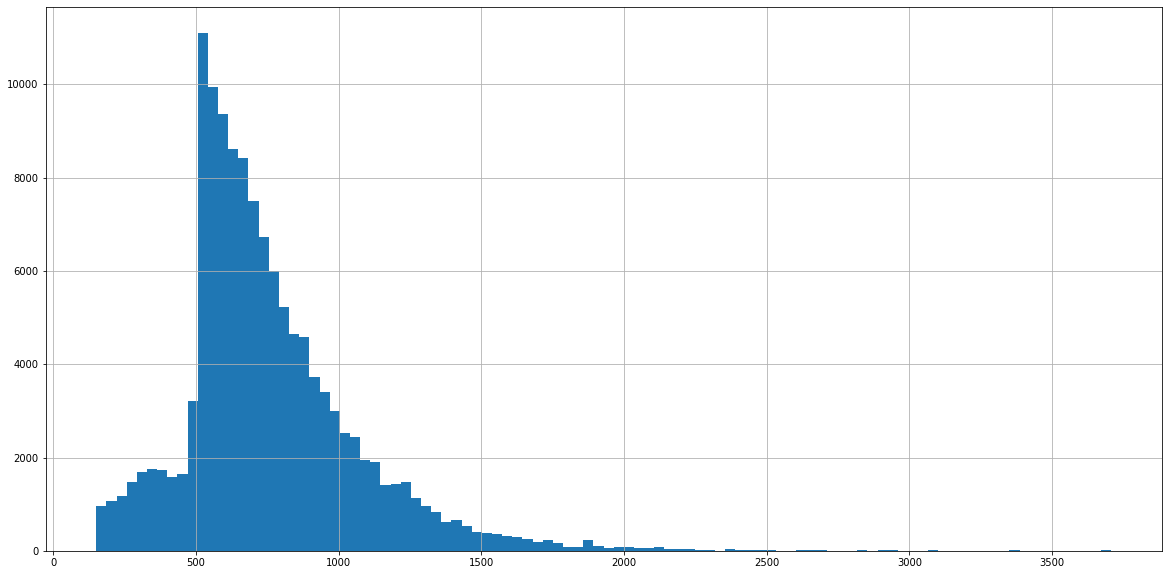

In [39]:
plt.figure(figsize=(20,10))
train["context_length"].hist(bins = 100)

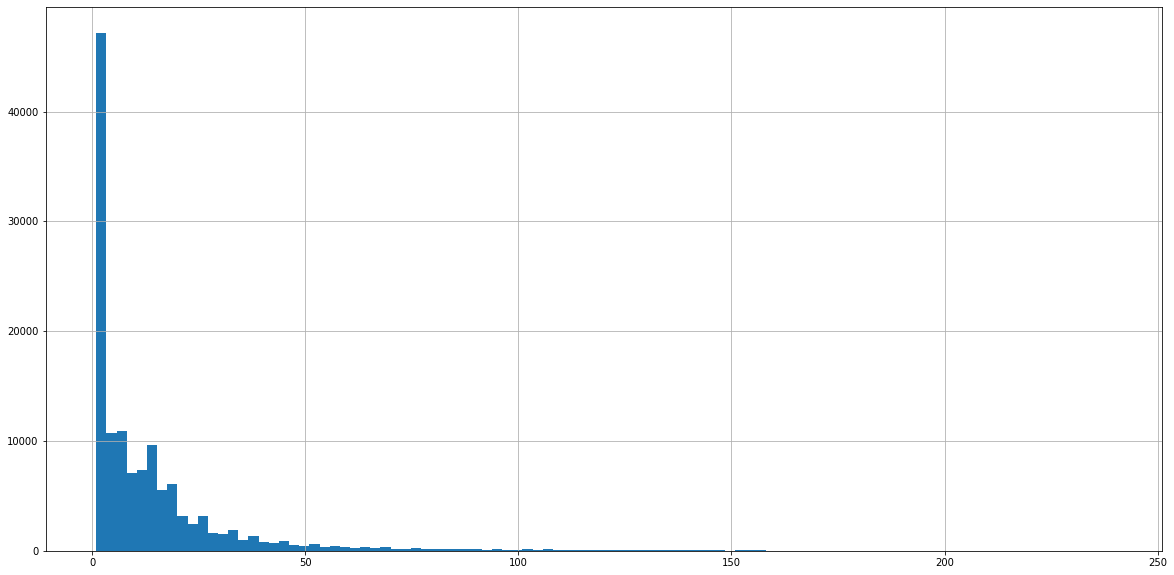

In [40]:
plt.figure(figsize=(20,10))
train["text_length"].hist(bins = 100)

(-64.075, 1346.6750000000002)

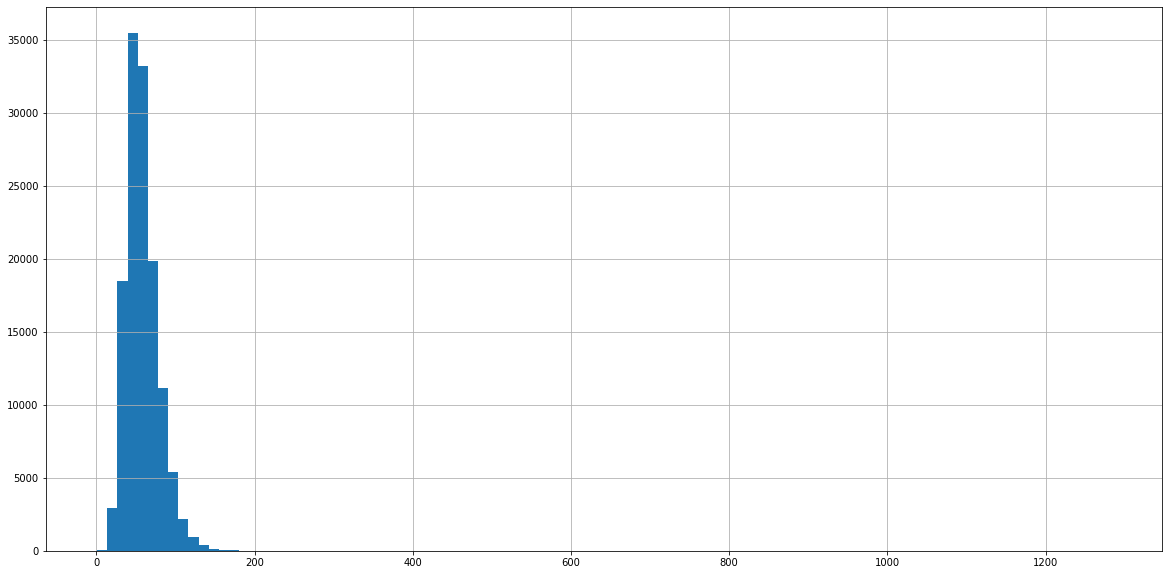

In [52]:
plt.figure(figsize=(20,10))
train["question_length"].hist(bins = 2000)
scale_factor = 0.05
xmin, xmax = plt.xlim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)

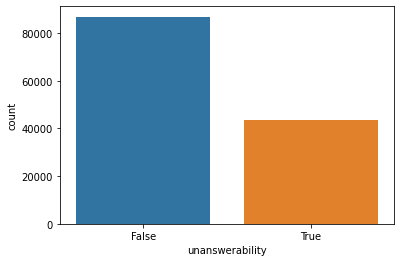

In [60]:
train["unanswerability"] = pd.isnull(train["text"])
sns.countplot(x="unanswerability", data = train)

new 29408
city 25867
used 21479
states 21361
time 21024
world 20592
state 19866
century 18933
united 18811
war 16418
known 15745
000 15084
including 14773
years 14706
people 14549
use 14492
government 14213
early 13477
year 13327
later 12549
called 12519
number 12313
north 11854
high 11678
american 11408
million 11371
university 11206
national 11178
power 10912
south 10863
population 10675
major 10412
music 10106
based 10055
area 10012
large 9906
british 9821
west 9764
period 9718
law 9513


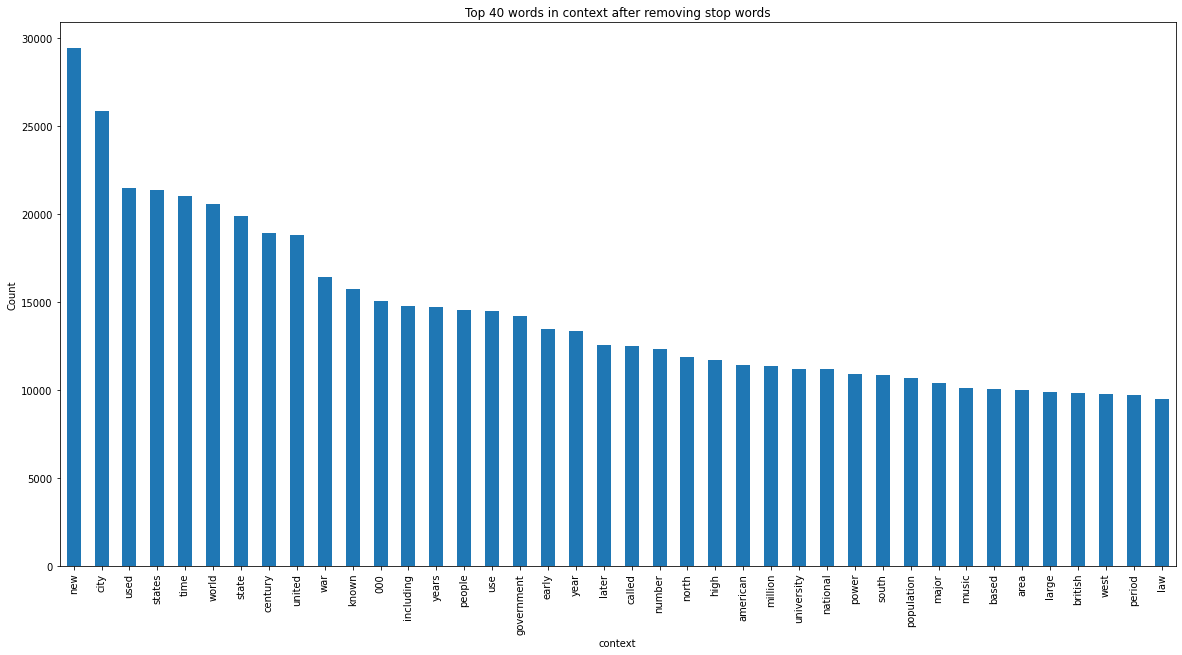

In [74]:
plt.figure(figsize=(20,10))
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(train['context'], 40)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['context' , 'count'])
df2.groupby('context').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', ylabel='Count', title='Top 40 words in context after removing stop words')

united states 13167
citation needed 5856
new york 4765
19th century 3592
world war 3501
20th century 3155
united kingdom 2483
soviet union 2128
war ii 1879
new haven 1828
north america 1791
san diego 1749
prime minister 1735
supreme court 1725
york city 1616
premier league 1517
civil war 1425
years ago 1404
middle ages 1384
18th century 1358
north carolina 1325
united nations 1250
roman catholic 1158
air force 1126
took place 1099
new zealand 1058
catholic church 1037
federal government 1029
roman empire 1020
present day 1004
million years 981
great britain 978
human rights 950
armed forces 938
ottoman empire 932
affirmative action 894
european union 887
17th century 879
xbox 360 870
16th century 855


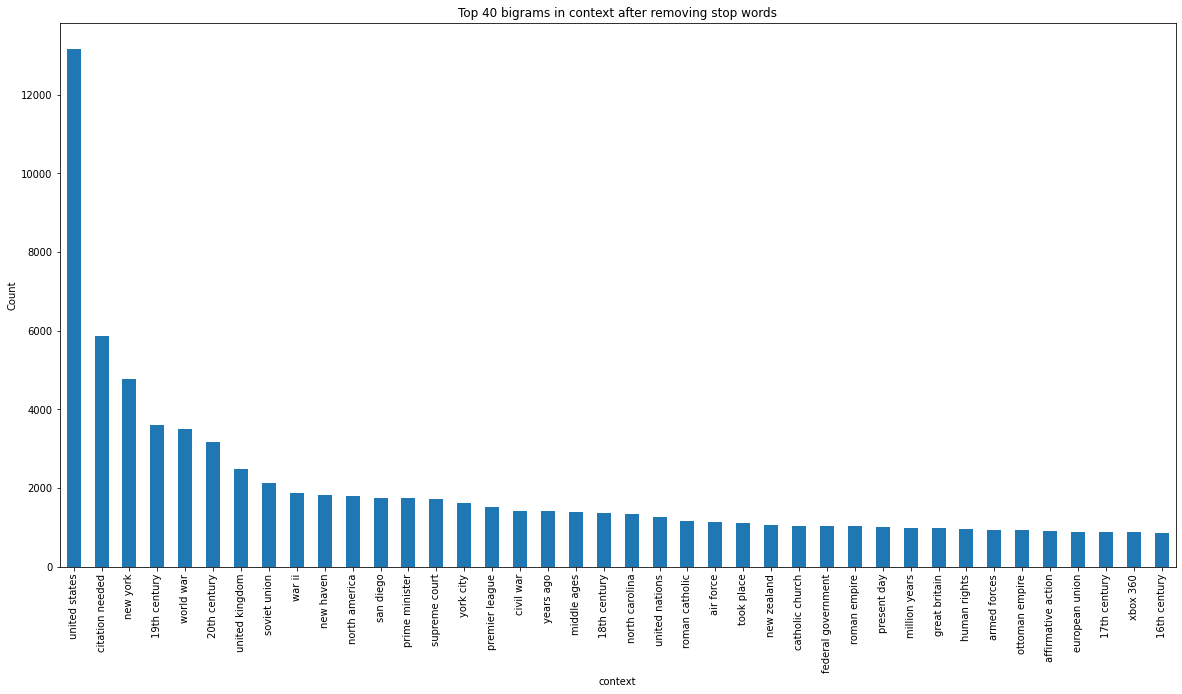

In [77]:
plt.figure(figsize=(20,10))
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(train['context'], 40)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['context' , 'count'])
df3.groupby('context').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', ylabel='Count', title='Top 40 bigrams in context after removing stop words')

In [98]:
def question_tagging(question):
  question = question.lower()
  
  if "what" in question:
    return "what"
  elif "when" in question:
    return "when"
  elif "who" in question:
    return "who"
  elif "how" in question:
    return "how"
  elif "which" in question:
    return "which"
  elif "where" in question:
    return "where"
  elif "why" in question:
    return "why"
  else:
    return "none"

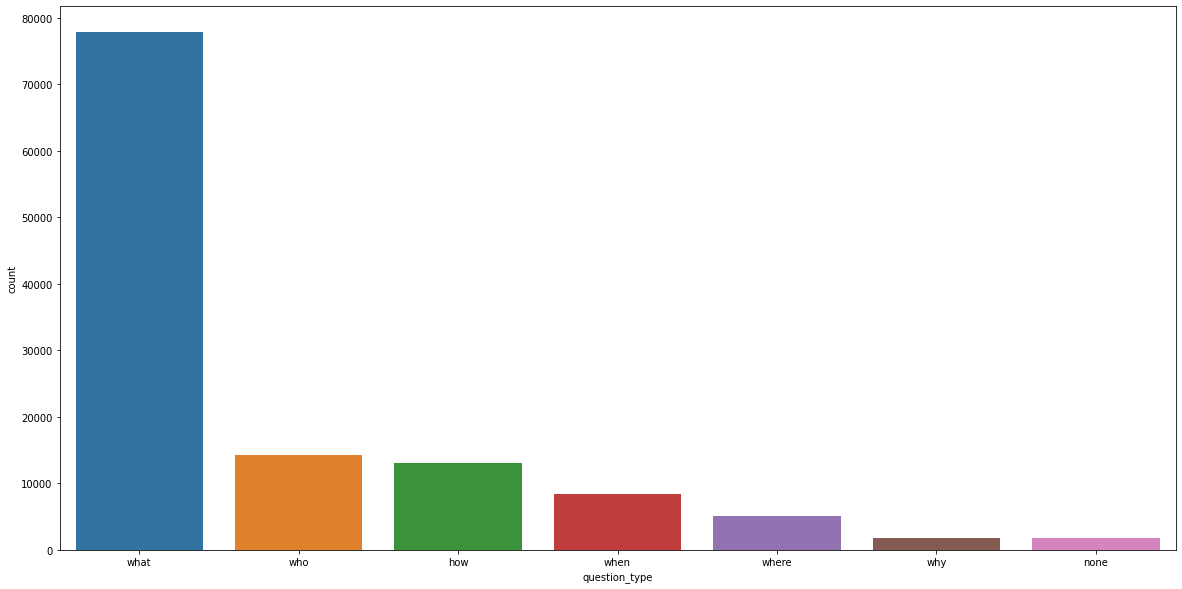

In [103]:
plt.figure(figsize=(20,10))
train["question_type"] = train["question"].apply(question_tagging)
sns.countplot(x="question_type",data = train, order = ["what","who","how","when","where","why","none"])

In [107]:
train[train["question_type"] == "none"].head(10)

index  ... question_type
230   56bf9dbda10cfb14005511c5  ...          none
477   56bfbf2fa10cfb14005512a2  ...          none
486   56bec29b3aeaaa14008c9380  ...          none
693   56bed32f3aeaaa14008c94d0  ...          none
923   56d3123b59d6e41400146208  ...          none
1823  56cc655c6d243a140015ef93  ...          none
1945  56cfbaed234ae51400d9bf25  ...          none
2744  56cf54f0aab44d1400b89016  ...          none
2891  56cef6ccaab44d1400b88d48  ...          none
3223  56d6713f1c85041400947120  ...          none

[10 rows x 11 columns]

In [27]:
# TOPIC MODELLING ON SQUAD

In [28]:
!pip3 install bertopic[all]

  Using cached https://files.pythonhosted.org/packages/f6/9e/16678af67081452c01fcaeca5fd734a1033be2da0e9d40815ee742588ef4/bertopic-0.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3b/fd/8a81047bbd9fa134a3f27e12937d2a487bd49d353a038916a5d7ed4e5543/sentence-transformers-2.0.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/75/69/85e7f950bb75792ad5d666d86c5f3e62eedbb942848e7e3126513af9999c/umap-learn-0.5.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/3f/03/c3526fb4e79a793498829ca570f2f868204ad9a8040afcd72d82a8f121db/numpy-1.21.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/9d/2e/69579c3db25fa4f85d70a10f8a98d52c2b4a0dcbd153e8f17f425761bef4/plotly-4.14.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/32/bb/59a75bc5ac66a9b4f9b8f979e4545af0e98bb1ca4e6ae96b3b956b554223/hdbscan-0.8.27.tar.gz
  Installing build dependencies ... done
  Ge

In [26]:
from bertopic import BERTopic

In [27]:
unique_contexts = train["context"].unique()

In [28]:
topic_model = BERTopic(language="english", calculate_probabilities=True) # We need the probabilities to visualize
topics, _ = topic_model.fit_transform(unique_contexts)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [29]:
# Get the most frequent topics
topic_freq = topic_model.get_topic_freq()
outliers = topic_freq['Count'][topic_freq['Topic']==-1].iloc[0]
print(f"{outliers} documents have not been classified")
print(f"The other {topic_freq['Count'].sum() - outliers} documents are {topic_freq['Topic'].shape[0]-1} topics")

3878 documents have not been classified
The other 15151 documents are 384 topics


In [30]:
topic_freq.head()

Topic  Count
0     -1   3878
1      0    240
2      1    198
3      2    156
4      3    127

In [31]:
print(f"There are {topic_freq['Count'].iloc[1]} documents that are talking about topic ID {topic_freq['Topic'].iloc[1]}")

There are 240 documents that are talking about topic ID 0


In [32]:
for i in range(10):
  topic_no = topic_freq['Topic'].iloc[i]
  print("Topic ", topic_no," : \n")
  print(topic_model.get_topic(topic_no))
  print("\n\n")

Topic  -1  : 

[('greek', 0.0015180439180839632), ('british', 0.0013962400350661227), ('german', 0.0013646721964630287), ('war', 0.0012898636704285376), ('french', 0.0012080851490776357), ('european', 0.0011486171223951329), ('school', 0.0010694282778653862), ('yale', 0.0010616449512649497), ('language', 0.0010596249906809812), ('roman', 0.0010589718826928567)]



Topic  0  : 

[('presbyterian', 0.019016840784332828), ('protestant', 0.01504362204565268), ('christian', 0.007912524457099411), ('christians', 0.006750598873560779), ('protestants', 0.006407064029836561), ('christianity', 0.006184253104644488), ('evangelical', 0.0061624452510585384), ('presbyterians', 0.005524293168196186), ('anglican', 0.004957909883455339), ('protestantism', 0.0045472194381634586)]



Topic  1  : 

[('architecture', 0.017906666238276348), ('cathedral', 0.01049273252125375), ('building', 0.008616155508569694), ('architects', 0.006870716028826526), ('architectural', 0.006463920759584818), ('cathedrals', 0.00

In [33]:
# Returns how spatially separated each topic is.
topic_model.visualize_topics()

In [34]:
new_topic = "Buddha"

In [35]:
# Find_Topic function returns the five most similar topics to the input text in the decreasing order
topic_model.find_topics(new_topic)

([2, 30, 381, 210, 253],
 [0.8621923588193054,
  0.6075197729599469,
  0.5933920788639653,
  0.5873172231056335,
  0.5729707524387071])

In [ ]:
topic_model.find_topics(new_topic)[1][0]

0.30188635478062975

In [36]:
#Get_Topic returns the contents of each topic 
topic_model.get_topic(2)

[('buddhism', 0.030622368663937735),
 ('buddha', 0.023052626518777833),
 ('buddhist', 0.020458639129479244),
 ('mahayana', 0.01858326757188532),
 ('meditation', 0.010948718655272152),
 ('buddhas', 0.010714431568464891),
 ('sutras', 0.009004947218715075),
 ('buddhists', 0.006915647803808081),
 ('yoga', 0.006344239022956809),
 ('meditative', 0.00586502437850279)]

In [37]:
# Heatmap on the correlation between each of the clustered topics
plt.figure(figsize=(200,200))
topic_model.visualize_heatmap()

<Figure size 14400x14400 with 0 Axes>

In [39]:
# Agglomerative Clustering on the topics clustered based on unique contexts
topic_model.visualize_hierarchy()

In [40]:
topic_model.get_params()

{'calculate_probabilities': True,
 'embedding_model': <bertopic.backend._sentencetransformers.SentenceTransformerBackend at 0x7feb3198aa50>,
 'hdbscan_model': HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
         approx_min_span_tree=True, cluster_selection_epsilon=0.0,
         cluster_selection_method='eom', core_dist_n_jobs=4,
         gen_min_span_tree=False, leaf_size=40,
         match_reference_implementation=False, memory=Memory(location=None),
         metric='euclidean', min_cluster_size=10, min_samples=None, p=None,
         prediction_data=True),
 'language': 'english',
 'low_memory': False,
 'min_topic_size': 10,
 'n_gram_range': (1, 1),
 'nr_topics': None,
 'top_n_words': 10,
 'umap_model': UMAP(a=None, angular_rp_forest=True, b=None, dens_frac=0.0, dens_lambda=0.0,
      dens_var_shift=0.1, densmap=False, disconnection_distance=None,
      force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
      local_connectivity=1.0, low_memory

In [ ]:
topic_model.save("./topic_model")

In [ ]:
topic_model.load("/content/drive/MyDrive/AutomatedQuestionGeneration/topic_model")

In [ ]:
# TOPIC MODEL FILTERIZER

In [41]:
train.head(20)

index  ... c_id
0   56be85543aeaaa14008c9063  ...    0
1   56be85543aeaaa14008c9065  ...    0
2   56be85543aeaaa14008c9066  ...    0
3   56bf6b0f3aeaaa14008c9601  ...    0
4   56bf6b0f3aeaaa14008c9602  ...    0
5   56bf6b0f3aeaaa14008c9603  ...    0
6   56bf6b0f3aeaaa14008c9604  ...    0
7   56bf6b0f3aeaaa14008c9605  ...    0
8   56d43c5f2ccc5a1400d830a9  ...    0
9   56d43c5f2ccc5a1400d830aa  ...    0
10  56d43c5f2ccc5a1400d830ab  ...    0
11  56d43c5f2ccc5a1400d830ac  ...    0
12  56d43c5f2ccc5a1400d830ad  ...    0
13  56d43ce42ccc5a1400d830b4  ...    0
14  56d43ce42ccc5a1400d830b5  ...    0
15  56be86cf3aeaaa14008c9076  ...    1
16  56be86cf3aeaaa14008c9078  ...    1
17  56be86cf3aeaaa14008c9079  ...    1
18  56bf6e823aeaaa14008c9627  ...    1
19  56bf6e823aeaaa14008c9629  ...    1

[20 rows x 6 columns]

In [42]:
train.iloc[0,2]

'Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny\'s Child. Managed by her father, Mathew Knowles, the group became one of the world\'s best-selling girl groups of all time. Their hiatus saw the release of Beyoncé\'s debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".'

In [ ]:
def topic_filterizer(question):
  if topic_model.find_topics(question)[1][0] >= 0.5:
    return True
  else:
    return False

new_train = train[train["question"].apply(topic_filterizer) == True].head()

In [ ]:
train[train["question"].apply(topic_filterizer) == True]

In [58]:
c = 0
for i in range(300):
  if topic_model.find_topics(unanswerable_train.iloc[i,1])[1][0] >= 0.3:
    c += 1
  else:
    print(i)
print("Count: ",c)

15
30
55
60
68
69
75
80
125
134
179
193
195
201
236
267
277
Count:  283


In [ ]:
# Checking if a question returned as not related to any context (since similarity < threshold) is actually an ambiguous question

In [59]:
# Similarity of the topic most similar to that question
topic_model.find_topics(unanswerable_train.iloc[75,1])

([280, 127, 27, 110, 95],
 [0.28429659243266747,
  0.24898948620547795,
  0.22805656773721722,
  0.22614689466971294,
  0.2251516265330041])

In [60]:
topic_model.find_topics(unanswerable_train.iloc[75,2])

([325, 44, 202, 121, 272],
 [0.426831726656728,
  0.40685235868771363,
  0.31113241273852527,
  0.30704529642746625,
  0.30701029305889926])

In [53]:
# Question under analysis
unanswerable_train.iloc[75,1]

'How long did it take to implement riding Phantoms in a believable manner?'

In [54]:
# Context for that particular question
unanswerable_train.iloc[75,2]

"In four months, Aonuma's team managed to present realistic horseback riding,[l] which Nintendo later revealed to the public with a trailer at Electronic Entertainment Expo 2004. The game was scheduled to be released the next year, and was no longer a follow-up to The Wind Waker; a true sequel to it was released for the Nintendo DS in 2007, in the form of Phantom Hourglass. Miyamoto explained in interviews that the graphical style was chosen to satisfy demand, and that it better fit the theme of an older incarnation of Link. The game runs on a modified The Wind Waker engine."

In [48]:
# Answer to that question
unanswerable_train.iloc[15,3]

nan